[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yella\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yella\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yella\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enter the path to the CSV file: C:\Users\yella\Downloads\archive\emma_tweets.csv
Enter the name of the text column: text
Most common words:
[('emmaraducanu', 9860), ('https', 9728), ('emma', 2178), ('usopen', 2080), ('tennis', 1784), ('raducanu', 1689), ('us', 1171), ('open', 1091), ('win', 901), ('congratulations', 857)]


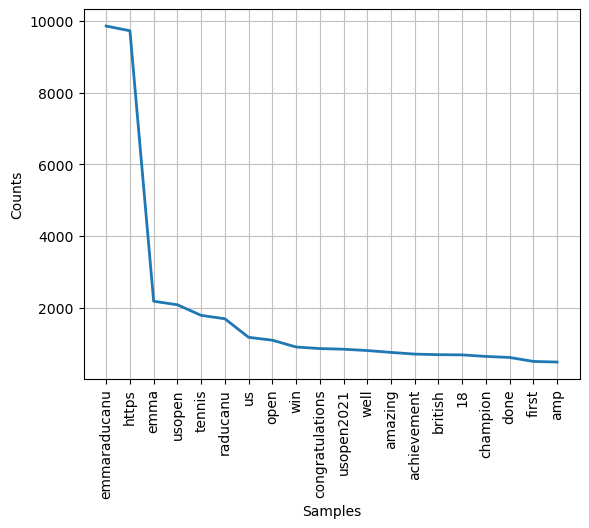

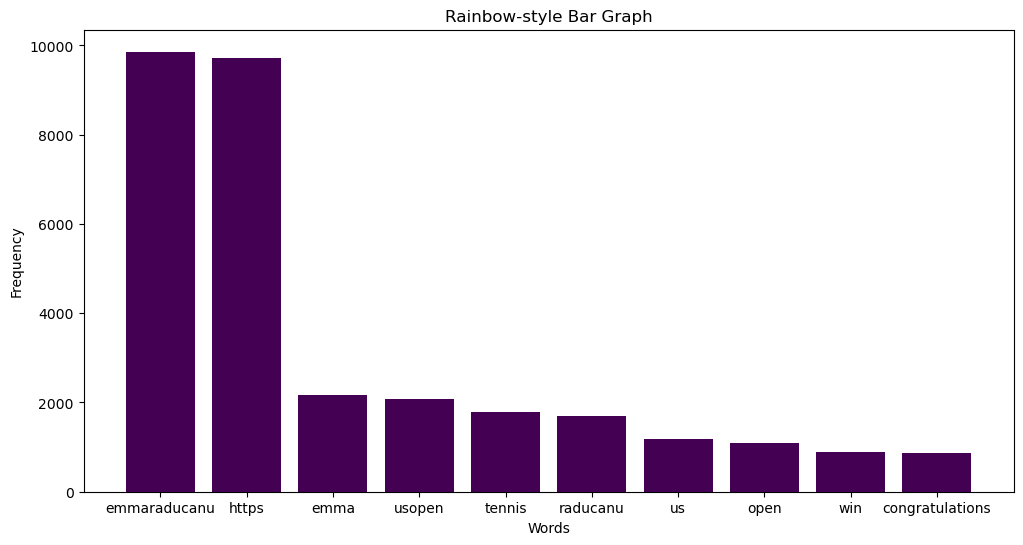

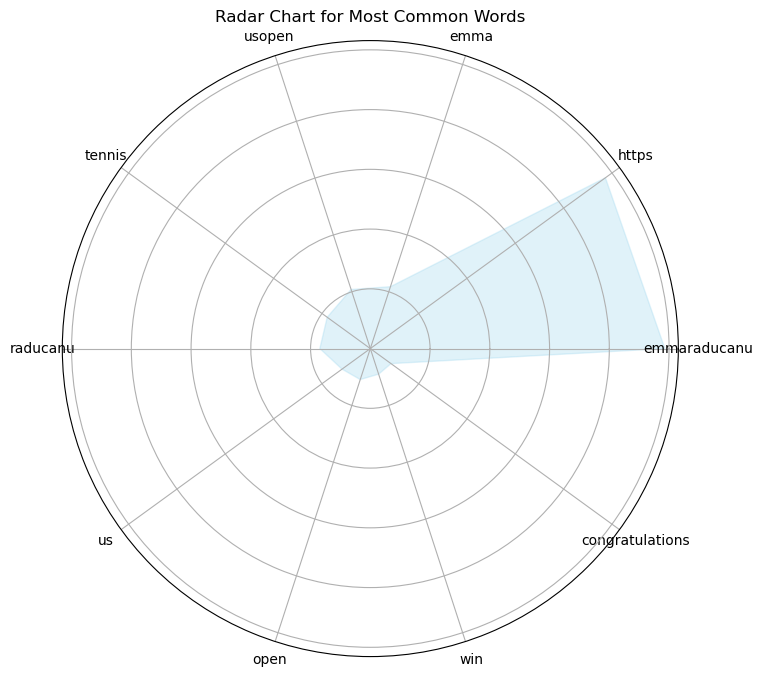

Enter the name of the category column: favorites
Enter a new text for classification: text
Predicted category: 0


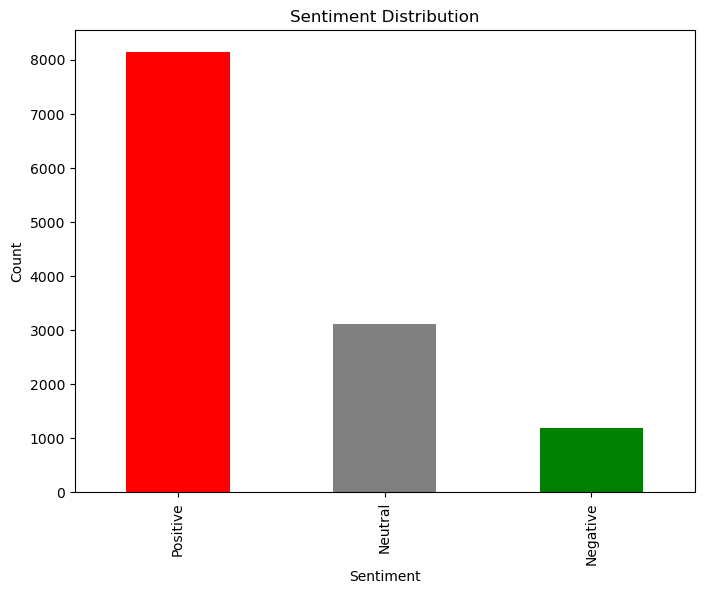

In [1]:
!pip install nltk
!pip install pandas

import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

def extract_features(document):
    return {word: True for word in document}

def train_text_classifier(data, text_column, category_column):
    documents = [(word_tokenize(text), category) for text, category in zip(data[text_column], data[category_column])]
    featuresets = [(extract_features(text), category) for (text, category) in documents]
    classifier = NaiveBayesClassifier.train(featuresets)
    return classifier

def analyze_text_from_csv(file_path, text_column, classify_text=False, analyze_sentiment=False):
    data = pd.read_csv(file_path, encoding='latin-1')
    text_data = " ".join(data[text_column].astype(str))
    tokens = word_tokenize(text_data)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    fdist = FreqDist(filtered_tokens)
    
    print("Most common words:")
    print(fdist.most_common(10))
    
    # Bar Chart
    fdist.plot(20, cumulative=False)
    plt.show()
    
    # Rainbow-style Bar Graph
    plt.figure(figsize=(12, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(fdist)))
    plt.bar(*zip(*fdist.most_common(10)), color=colors)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Rainbow-style Bar Graph')
    plt.show()
    
    # Radar Chart
    labels, values = zip(*fdist.most_common(10))
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
    values = np.concatenate((values, [values[0]]))  # Close the circle
    angles = np.concatenate((angles, [angles[0]]))  # Close the circle
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='skyblue', alpha=0.25)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title('Radar Chart for Most Common Words')
    plt.show()

    if classify_text:
        # Assuming you have a 'Category' column in your CSV for text classification
        category_column = input("Enter the name of the category column: ")
        classifier = train_text_classifier(data, text_column, category_column)

        # Example: Classifying a new text
        new_text = input("Enter a new text for classification: ")
        new_tokens = word_tokenize(new_text)
        new_features = extract_features(new_tokens)
        predicted_category = classifier.classify(new_features)
        print(f"Predicted category: {predicted_category}")

    if analyze_sentiment:
        # Sentiment Analysis using NLTK's SentimentIntensityAnalyzer
        sid = SentimentIntensityAnalyzer()
        sentiment_scores = [sid.polarity_scores(sentence)["compound"] for sentence in data[text_column]]
        data['Sentiment'] = pd.cut(sentiment_scores, bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])
        
        # Plotting Sentiment Distribution
        plt.figure(figsize=(8, 6))
        data['Sentiment'].value_counts().plot(kind='bar', color=['red', 'grey', 'green'])
        plt.title('Sentiment Distribution')
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.show()

if __name__ == "__main__":
    file_path = input("Enter the path to the CSV file: ")
    text_column = input("Enter the name of the text column: ")
    try:
        analyze_text_from_csv(file_path, text_column, classify_text=True, analyze_sentiment=True)
    except Exception as e:
        print(f"Error: {e}")
